<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 1*

# 📝 Assignment
---
# Choose your ML problems

이번 스프린트에서는 포트폴리오 프로젝트를 위해 수강생 각자가 정한 데이터셋을 사용하여 과제를 수행합니다. 프로젝트를 위한 데이터를 최종 선택하기 전에 여러 가능한 데이터세트를 살펴보고 간단한 모델까지 학습해 보는 것을 추천드립니다.

In [88]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 3.6 MB/s 


### 1) 타겟으로 사용할 특성을 선택합니다.
**(Urclass Quiz)** 여러분들이 프로젝트에 사용할 데이터셋과 타겟특성에 대해 아래의 내용을 포함하여 간략하게 설명해주세요. 
* `df.dtypes`을 사용해서 타겟특성의 데이터 타입 확인
* `df.describe()`를 사용해서 타겟특성의 대표값 확인(실수-평균, 범주형-최빈값)

* enrollee_id : Unique ID for candidate

* city: City code

* city_ development _index : Developement index of the city (scaled)

* gender: Gender of candidate

* relevent_experience: Relevant experience of candidate

* enrolled_university: Type of University course enrolled if any

* education_level: Education level of candidate

* major_discipline :Education major discipline of candidate

* experience: Candidate total experience in years

* company_size: No of employees in current employer's company

* company_type : Type of current employer

* lastnewjob: Difference in years between previous job and current job

* training_hours: training hours completed

* target: 0 – Not looking for job change, 1 – Looking for a job change

In [1]:
import pandas as pd
import numpy as np

from google.colab import files

In [2]:
files.upload()

Saving aug_test.csv to aug_test.csv
Saving aug_train.csv to aug_train.csv


{'aug_test.csv': b'enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours\n32403,city_41,0.8270000000000001,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,,1,21\n9858,city_103,0.92,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,,Pvt Ltd,1,98\n31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,,<1,,Pvt Ltd,never,15\n27385,city_13,0.8270000000000001,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39\n27724,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72\n217,city_23,0.899,Male,No relevent experience,Part time course,Masters,STEM,10,,,2,12\n21465,city_21,0.624,,Has relevent experience,no_enrollment,Graduate,STEM,<1,100-500,Pvt Ltd,1,11\n27302,city_160,0.92,Female,Has relevent experience,no_enrollment,Graduate,STEM,>20,,,>4,81\n12994

In [73]:
train = pd.read_csv('aug_train.csv')
test = pd.read_csv('aug_test.csv')

In [15]:
print(train.shape)
train.head()

(19158, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [11]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

### 2) 풀고자 하는 문제가 분류/회귀 문제인지 정합니다.
**(Urclass Quiz)** 다이아몬드를 보관하기 위해 금고를 만들었습니다. 금고가 너무 작아서 가격이 상위 25%인 것만 보관하려고 합니다. 이를 위해 'price' 특성을 이용해 금고에 보관할 다이아몬드와 그렇지 않은 것으로 분류하는 이진분류 컬럼을 만들어 타겟 특성으로 사용할 것입니다. 타겟 특성의 최빈값의 빈도수를 적어주세요.
- 'top25'라는 새로운 타겟변수(컬럼)를 만들어주세요.
- 상위 25% 이상 True, 상위 25% 미만 False

   

In [17]:
### 이곳에서 과제를 진행해 주세요 ### 
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [29]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [32]:
per25 = len(diamonds['price']) * (25/100)

In [31]:
top_25per

13485.0

In [35]:
diamonds.sort_values(['price'], ascending=False, inplace=True)
diamonds.reset_index(inplace=True, drop=True)

In [39]:
diamonds.loc[:top_25per - 1, 'top25'] = True
diamonds.loc[top_25per:, 'top25'] = False

In [41]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,top25
0,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,True
1,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,True
2,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,True
3,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,True
4,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,True


In [52]:
diamonds['top25'].value_counts()

False    40455
True     13485
Name: top25, dtype: int64

### 3) 타겟의 분포를 분석하고 사용할 평가지표를 선택합니다. 평가지표를 선택한 이유를 설명하세요.
- 분류: 클래스가 몇 개인지? 클래스 비율이 어떤지(balance or imbalance)
- 회귀: 타겟 분포가 right-skewed 인지? log-transform을 사용할 것인지?
- 분류: 다수 클래스(majority class) 비율이 50%~70% 인 경우 정확도(accuracy)만 사용해도 무방합니다. 하지만 범위를 넘어설 경우 정확도만을 사용해서는 모델을 잘못 이해할 수 있습니다. 어떤 평가지표를 사용해야 할까요?
- 회귀: MAE, RMSE, R^2 등을 사용할 수 있습니다.

---


**(Urclass Quiz)** 여러분들이 프로젝트에 사용할 데이터의 기준모델과 사용할 평가지표를 제출해주세요.

In [74]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train, train_size=0.8, test_size=0.2, random_state=42)
train.shape, val.shape

((15326, 14), (3832, 14))

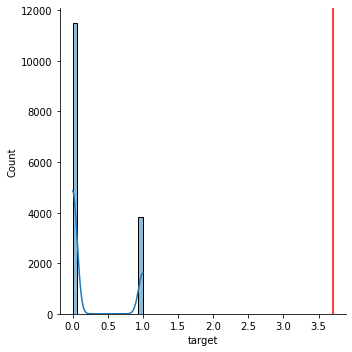

In [82]:
import matplotlib.pyplot as plt

sns.displot(train['target'],kde=True);
plt.axvline(3.7, color='red');

In [78]:
target = 'target'
feature = train.drop(columns=target).columns
X_train = train[feature]
X_val = val[feature]
y_train = train[target]
y_val = val[target]

X_train.shape, X_val.shape

((15326, 13), (3832, 13))

In [ ]:
import matplotlib.pyplot as plt
sns.displot(df['rating'],kde=True);
plt.axvline(3.7, color='red');

In [79]:
train['target'].value_counts(normalize=True)

0.0    0.750424
1.0    0.249576
Name: target, dtype: float64

In [80]:
major = 0
base_model = len(train) * [0]

In [81]:
from sklearn.metrics import accuracy_score

accuracy_score(base_model, y_train)

0.7504241158815086

In [94]:
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier


pipe = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, random_state=2, class_weight='balanced')
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

검증 정확도 0.7599164926931107


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matrix, n = 3832')

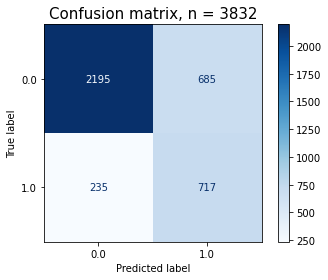

In [93]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

## 🔥 도전과제(Github - Discussion)

### 4) 실무에서 데이터분석가/데이터엔지니어/데이터사이언티스트에게 중요한 역량이 무엇이라고 생각하며, 어떤 어려움을 겪게 될 것 같은지와 어떤 능력이 필요할 지 논의해 보세요. 또한, 섹션2 프로젝트에 앞서 본인이 얻고자 하는 점이나 다짐 등을 서로 공유해 보세요. 


In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 